In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from FABdiffME.targets.crossed_ring import CrossedRing

### Test implementation of crossed ring: 
Example from https://arxiv.org/abs/2212.06172

Proposed in paper: overlap of two Gaussians
- advantage: direct sampling possible
- disadvantage: samples might land outside of unit square

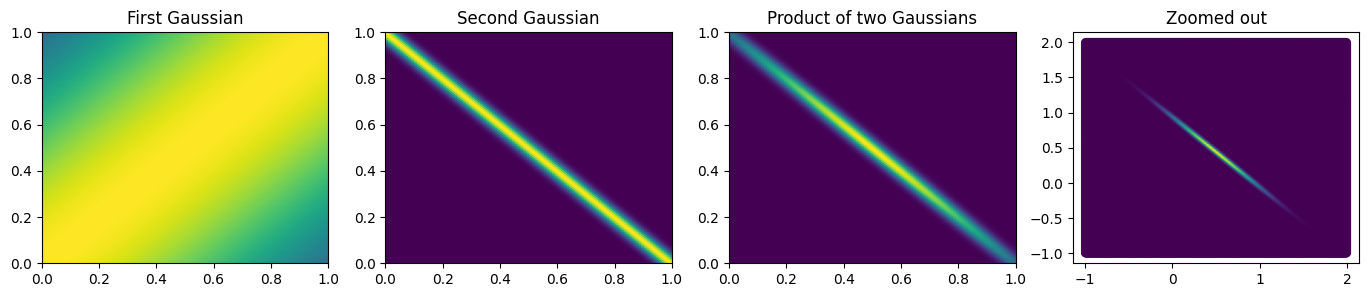

In [2]:
x = y = jnp.linspace(-1, 2, 300)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])

# first Gaussian, located along diagonal f(x) = x
mu1 = 0 # y-axis crossing
sigma1 = 0.5 # width
x1 = (grid_unit[:,0] - grid_unit[:,1])/jnp.sqrt(2)
arg1 = -(x1 - mu1)**2 / (2*sigma1**2)
p1 = jnp.exp(arg1)

# second Gaussian, located along diagonal f(x) = -x
mu2 = 0.72 # y-axis crossing
sigma2 = 0.02 # width
x2 = (grid_unit[:,0] + grid_unit[:,1])/jnp.sqrt(2)
arg2 = -(x2 - mu2)**2 / (2*sigma2**2)
p2 = jnp.exp(arg2)

fig, axs = plt.subplots(1,4, figsize=(17, 3))
axs[0].scatter(grid_unit[:,0], grid_unit[:,1], c=p1)
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1])
axs[0].set_title("First Gaussian")
axs[1].scatter(grid_unit[:,0], grid_unit[:,1], c=p2)
axs[1].set_xlim([0,1])
axs[1].set_ylim([0,1])
axs[1].set_title("Second Gaussian")
axs[2].scatter(grid_unit[:,0], grid_unit[:,1], c=p1*p2)
axs[2].set_xlim([0,1])
axs[2].set_ylim([0,1])
axs[2].set_title("Product of two Gaussians")
axs[3].scatter(grid_unit[:,0], grid_unit[:,1], c=p1*p2)
axs[3].set_title("Zoomed out");

In [3]:
target = CrossedRing()
# Evaluate target on grid
prob = target.prob(grid_unit)

# Generate samples and evaluate p
key = jax.random.PRNGKey(42)
key, subkey = jax.random.split(key)
samples = target.sample(subkey, 200)
p_samples = target.prob(samples)

0 / 200
147 / 200


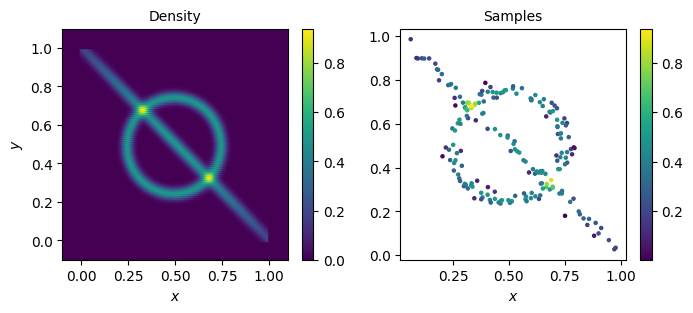

In [4]:
fig, axs = plt.subplots(1,2, figsize=(8, 3))
pcm0 = axs[0].scatter(grid_unit[:,0], grid_unit[:,1], c=prob, s=7)
cbar = fig.colorbar(pcm0, ax=axs[0])
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[0].set_title("Density", fontsize=10)
axs[0].set_xlim([-0.1,1.1])
axs[0].set_ylim([-0.1,1.1])

pcm1 = axs[1].scatter(samples[:,0], samples[:,1], c=p_samples, s=5)
cbar = fig.colorbar(pcm1, ax=axs[1])
axs[1].set_xlabel(r"$x$")
axs[1].set_title("Samples", fontsize=10);

Alternative: map data points to diagonal and cut outside of unit square
- advantage: no samples guaranteed to be outside of unit square
- disadvantage: no direct sampling

(0.0, 1.0)

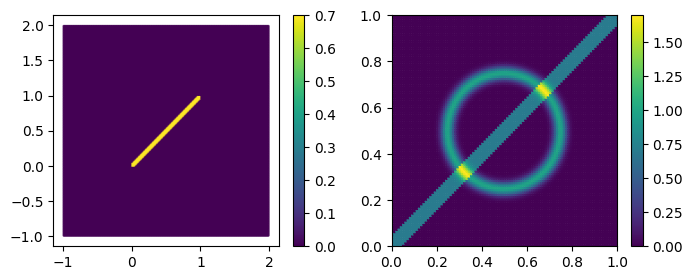

In [5]:
d = 0.05
p_max = 0.7
p_line = jnp.where(grid_unit[:,0]<grid_unit[:,1]+d, p_max, 0)
p_line = jnp.where(grid_unit[:,0]>grid_unit[:,1]-d, p_line, 0)
p_line = jnp.where(grid_unit[:,0]>1, 0, p_line)
p_line = jnp.where(grid_unit[:,0]<0, 0, p_line)
p_line = jnp.where(grid_unit[:,1]>1, 0, p_line)
p_line = jnp.where(grid_unit[:,1]<0, 0, p_line)

fig, axs = plt.subplots(1,2, figsize=(8, 3))
pcm0 = axs[0].scatter(grid_unit[:,0], grid_unit[:,1], c=p_line, s=.1)
cbar = fig.colorbar(pcm0, ax=axs[0])
pcm1 = axs[1].scatter(grid_unit[:,0], grid_unit[:,1], c=p_line+target.p_circle(grid_unit), s=2)
cbar = fig.colorbar(pcm1, ax=axs[1])
axs[1].set_xlim([0,1])
axs[1].set_ylim([0,1])